In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

### Publicaciones por categorias

In [2]:
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
#df_avisos_detalle.head()

In [3]:
print (df_avisos_detalle['tipo_de_trabajo'].value_counts())
print ("Cantidad de modalidades de trabajo: ",df_avisos_detalle['tipo_de_trabajo'].value_counts().count())

Full-time          12339
Part-time            863
Teletrabajo          110
Pasantia              63
Por Horas             63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64
Cantidad de modalidades de trabajo:  9


### Publicaciones por modalidad de trabajo (tiempo)

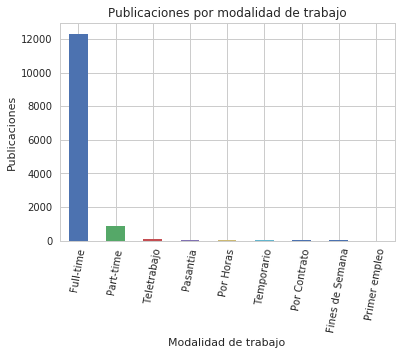

In [4]:
df_por_tipo_de_trabajo = df_avisos_detalle['tipo_de_trabajo'].value_counts()
df_por_tipo_de_trabajo.plot(kind='bar', rot=80, title='Publicaciones por modalidad de trabajo');
ax = plt.gca()
ax.set_ylabel('Publicaciones');
ax.set_xlabel('Modalidad de trabajo');

### Cantidad de publicaciones por nivel laboral

In [5]:
df_avisos_detalle['nivel_laboral'].value_counts()
print ("Cantidad de niveles de trabajo: ",df_avisos_detalle['nivel_laboral'].value_counts().count())

Cantidad de niveles de trabajo:  5


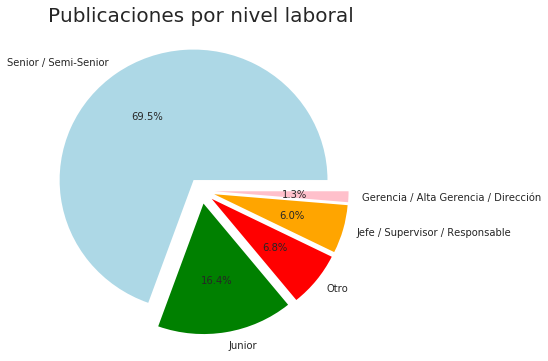

In [6]:
labels='Senior / Semi-Senior', 'Junior', 'Otro', 'Jefe / Supervisor / Responsable', 'Gerencia / Alta Gerencia / Dirección'
explodes=0.1, 0.1, 0.1, 0.1, 0.1
colors='lightblue', 'green', 'red', 'orange', 'pink'

plt.figure(figsize=(6, 6))
plt.title('Publicaciones por nivel laboral', fontsize=20)
plt.pie(df_avisos_detalle['nivel_laboral'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=0,
    colors=colors,explode=explodes)
plt.show()

### TOP 30 Áreas de trabajo con mas publicaciones

In [7]:
df_avisos_detalle['nombre_area'].str.upper().value_counts().count()
#df_avisos_detalle['nombre_area'].str.upper().value_counts()
df_avisos_detalle['nombre_area'].str.upper().value_counts()[:30]

VENTAS                             1659
COMERCIAL                           983
ADMINISTRACIÓN                      901
PRODUCCIÓN                          821
PROGRAMACIÓN                        576
CONTABILIDAD                        416
TECNOLOGIA / SISTEMAS               388
ATENCIÓN AL CLIENTE                 347
MANTENIMIENTO                       324
RECURSOS HUMANOS                    235
GASTRONOMIA                         234
OFICIOS Y PROFESIONES               209
SOPORTE TÉCNICO                     203
LOGÍSTICA                           200
CALL CENTER                         191
ALMACÉN / DEPÓSITO / EXPEDICIÓN     184
COMPRAS                             170
OTROS                               153
MARKETING                           153
ADMINISTRACIÓN DE PERSONAL          152
RECEPCIONISTA                       151
TRANSPORTE                          148
MANTENIMIENTO Y LIMPIEZA            141
FINANZAS                            138
TELEMARKETING                       138


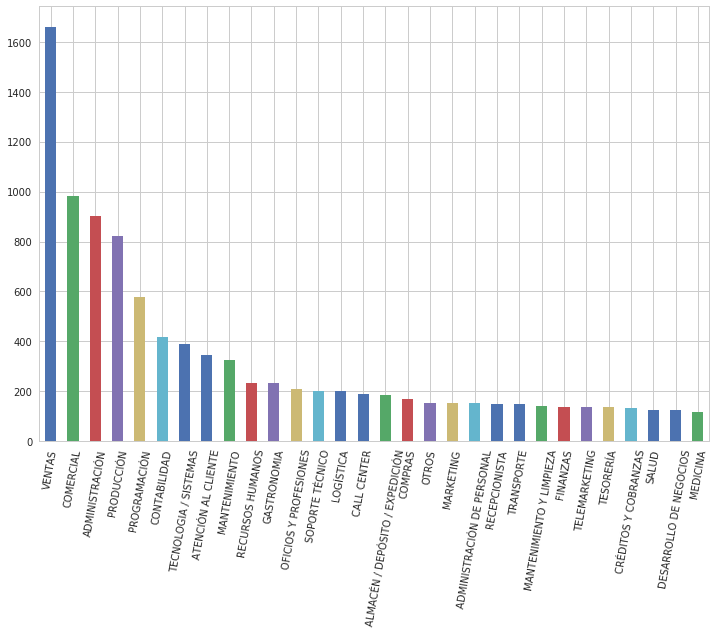

In [8]:
df_por_area_de_trabajo = df_avisos_detalle['nombre_area'].str.upper().value_counts()[:30]
df_por_area_de_trabajo.plot(kind='bar',rot=80,figsize=(12,8));

### Postulaciones por categorias

In [9]:
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv')
#df_postulaciones.head()

In [10]:
df_postulaciones_avisos = pd.merge(df_postulaciones, df_avisos_detalle, on='idaviso', how='inner')
#df_postulaciones_avisos.head()

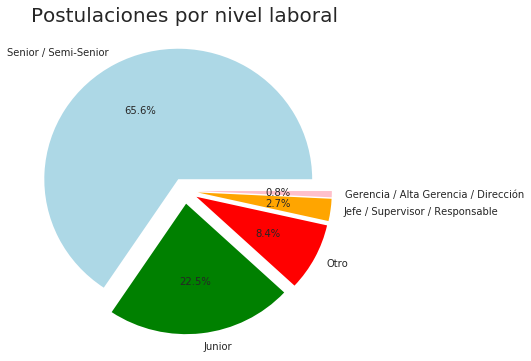

In [11]:
labels='Senior / Semi-Senior', 'Junior', 'Otro', 'Jefe / Supervisor / Responsable', 'Gerencia / Alta Gerencia / Dirección'
explodes=0.1, 0.1, 0.1, 0.1, 0.1
colors='lightblue', 'green', 'red', 'orange', 'pink'

plt.figure(figsize=(6, 6))
plt.title('Postulaciones por nivel laboral', fontsize=20)
plt.pie(df_postulaciones_avisos['nivel_laboral'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=0,
    colors=colors,explode=explodes)
plt.show()

### TOP 30 Áreas con mas postulaciones 

In [12]:
df_postulaciones_avisos['nombre_area'].str.upper().value_counts()[:30]

VENTAS                             408148
ADMINISTRACIÓN                     291135
PRODUCCIÓN                         277089
COMERCIAL                          216677
ATENCIÓN AL CLIENTE                195636
RECEPCIONISTA                      137485
CALL CENTER                        126430
TELEMARKETING                       87506
TESORERÍA                           78450
MANTENIMIENTO Y LIMPIEZA            63308
CONTABILIDAD                        55563
ALMACÉN / DEPÓSITO / EXPEDICIÓN     53261
GASTRONOMIA                         51213
RECURSOS HUMANOS                    45668
SECRETARIA                          39188
LOGÍSTICA                           37139
ADMINISTRACIÓN DE PERSONAL          37011
CRÉDITOS Y COBRANZAS                36690
MARKETING                           29861
LEGAL                               29295
FARMACÉUTICA                        29241
SOPORTE TÉCNICO                     29048
MANTENIMIENTO                       28462
CAMAREROS                         

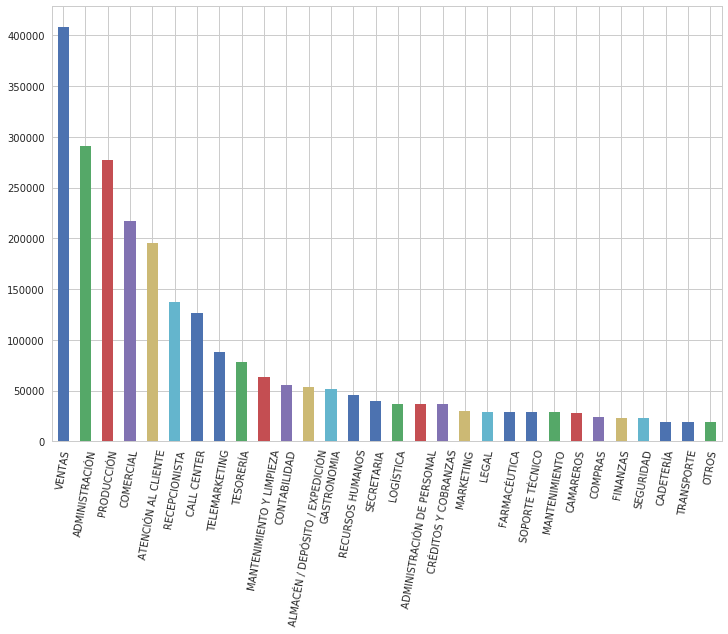

In [13]:
df_postulaciones_avisos['nombre_area'].str.upper().value_counts()[:30] \
    .plot(kind='bar',rot=80,figsize=(12,8));

In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords | {'a', 'ante', 'bajo', 'con', 'de', 'desde', 'durante', 
                         'en', 'entre', 'excepto', 'hacia', 'hasta', 'mediante', 
                         'para', 'por', 'salvo', 'según', 'sin', 'sobre', 'y', 'tras',
                        'el', 'la', 'lo', 'su', 'un', 'una', 'que', 'al'}

### Carga de datos corregidos

In [15]:
# %timeit sirve para evaluar el tiempo de ejecucion
print("------------------");
df_postulantes_educacion = pd.read_csv('../csv/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
print("###", end='');
df_postulantes_genero_edad = pd.read_csv('../csv/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad_fix.csv')
print("###", end='');
df_vistas_general = pd.read_csv('../csv/datos_navent_fiuba/fiuba_3_vistas.csv')
print("###", end='');
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv')
print("###", end='');
df_avisos_online = pd.read_csv('../csv/datos_navent_fiuba/fiuba_5_avisos_online.csv')
print("###", end='');
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
print("###");
print("------------------");

------------------
##################
------------------


### PreProcesamiento

In [16]:
df_postulantes_genero_edad['edad'] = (pd.to_datetime('today').year - pd.to_datetime(df_postulantes_genero_edad['fechanacimiento']).dt.year)

---
## Cantidad de usuarios registrados por edad y genero

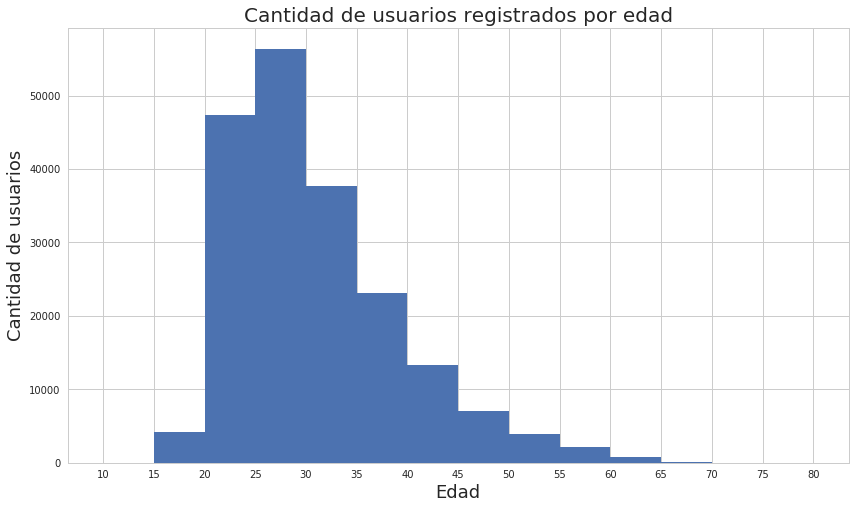

In [17]:
df_postulantes_genero_edad['edad'].dropna().hist(figsize=(14,8), bins=14, range=[10, 80]);
plt.xlabel('Edad', fontsize=18);
plt.ylabel('Cantidad de usuarios', fontsize=18)
plt.title('Cantidad de usuarios registrados por edad', fontsize=20);
plt.xticks(range(10, 81, 5))
plt.show();

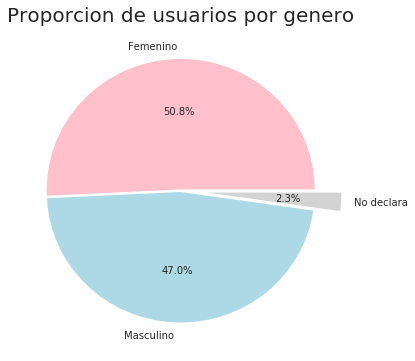

In [18]:
plt.figure(figsize=(6, 6))
plt.title('Proporcion de usuarios por genero', fontsize=20)
plt.pie(df_postulantes_genero_edad['sexo'].value_counts(), 
        labels=['Femenino', 'Masculino', 'No declara'], autopct='%1.1f%%', 
        startangle=0, 
        colors=['pink', 'lightblue', 'lightgray'], 
        explode=(0.01, 0.01, 0.2))
plt.show()

In [19]:
# TO DO: Stacked hist con usuarios por genero y edad

---
## Postulaciones de trabajo según rango de edad y genero

In [20]:
df_temp = pd.merge(df_postulantes_genero_edad, df_postulaciones, 
         on='idpostulante', how='inner')
df_temp.head()

,Unnamed: 0,idpostulante,fechanacimiento,sexo,edad,idaviso,fechapostulacion
0,0,NM5M,1970-12-03,FEM,48.0,1112257047,2018-01-15 16:22:34
1,0,NM5M,1970-12-03,FEM,48.0,1111920714,2018-02-06 09:04:50
2,0,NM5M,1970-12-03,FEM,48.0,1112346945,2018-02-22 09:04:47
3,0,NM5M,1970-12-03,FEM,48.0,1112345547,2018-02-22 09:04:59
4,1,5awk,1962-12-04,FEM,56.0,1112237522,2018-01-25 18:55:03


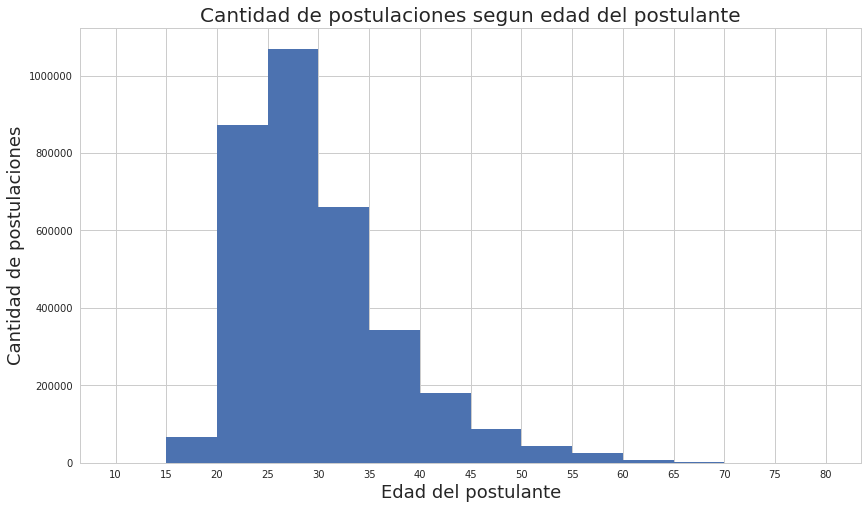

In [21]:
df_temp['edad'].dropna().hist(figsize=(14,8), bins=14, range=[10, 80]);
plt.xlabel('Edad del postulante', fontsize=18);
plt.ylabel('Cantidad de postulaciones', fontsize=18)
plt.title('Cantidad de postulaciones segun edad del postulante', fontsize=20);
plt.xticks(range(10, 81, 5))
plt.show();

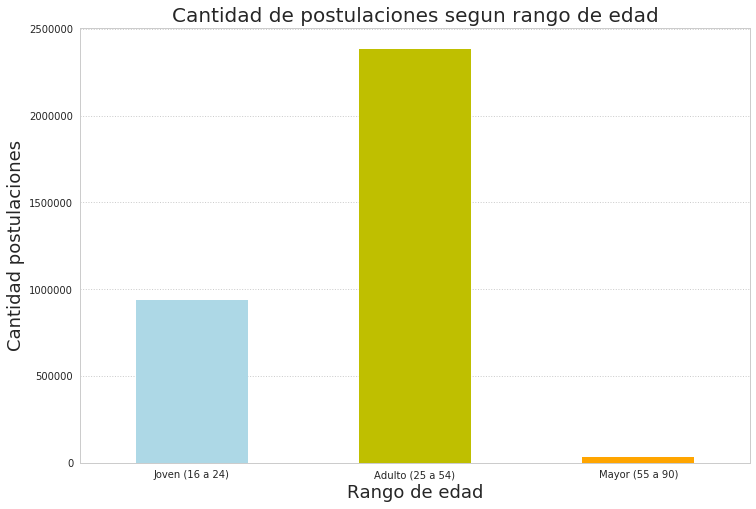

In [22]:
res_temp = pd.Series([(df_temp['edad'].dropna().between(16, 24, inclusive=True)).sum(),
           (df_temp['edad'].dropna().between(25, 54, inclusive=True)).sum(),
           (df_temp['edad'].dropna().between(55, 90, inclusive=True)).sum()])
col = ['lightblue','y','Orange']
plot = res_temp.plot(kind='bar', figsize=(12,8), rot=0, color=col)
plot.set_xlabel('Rango de edad', fontsize=18)
plot.set_ylabel('Cantidad postulaciones', fontsize=18)
plot.set_title('Cantidad de postulaciones segun rango de edad', fontsize=20)
plot.set_xticklabels( ('Joven (16 a 24)', 'Adulto (25 a 54)','Mayor (55 a 90)'))
plot.grid(linestyle='dotted')
plot.xaxis.grid(False);

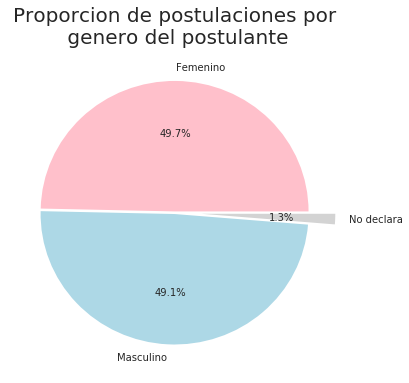

In [23]:
plt.figure(figsize=(6, 6))
plt.title('Proporcion de postulaciones por\n genero del postulante', fontsize=20)
plt.pie(df_temp['sexo'].value_counts(), 
        labels=['Femenino', 'Masculino', 'No declara'], autopct='%1.1f%%', 
        startangle=0, 
        colors=['pink', 'lightblue', 'lightgray'], 
        explode=(0.01, 0.01, 0.2))
plt.show()

## Publicaciones y Postulaciones según longitud de la descripción

A la descripcion se le quitan las etiquetas HTML porque no determinan la longitud del **contenido** de la descripcion

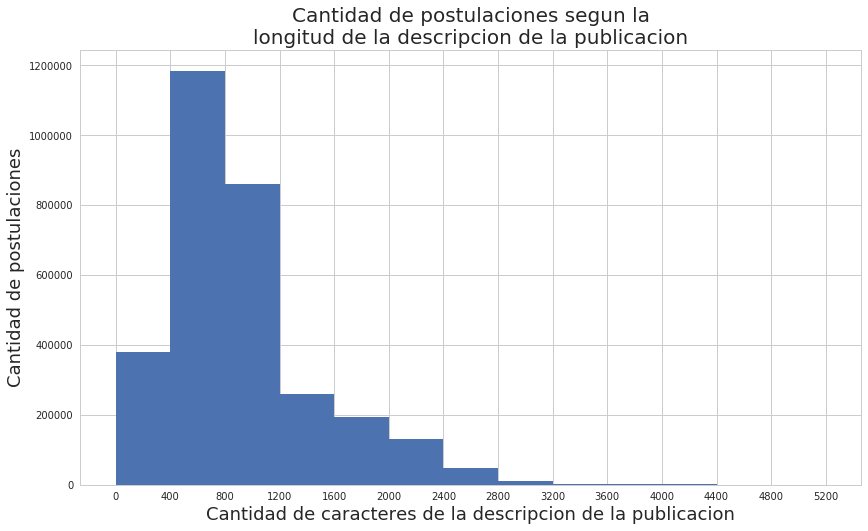

In [24]:
df_temp = df_avisos_detalle.copy()
df_temp['descripcion'] = df_temp['descripcion'].replace('<[^>]*>', '', regex=True)
df_temp = pd.merge(df_temp, df_postulaciones, 
         on='idaviso', how='inner')
df_temp['descripcion'].dropna().apply(len).hist(
    figsize=(14,8), bins=13, range=[0, 5201]);
plt.xlabel('Cantidad de caracteres de la descripcion de la publicacion', fontsize=18);
plt.ylabel('Cantidad de postulaciones', fontsize=18)
plt.title('Cantidad de postulaciones segun la\nlongitud de la descripcion de la publicacion', fontsize=20);
plt.xticks(range(0, 5201, 400))
plt.show();

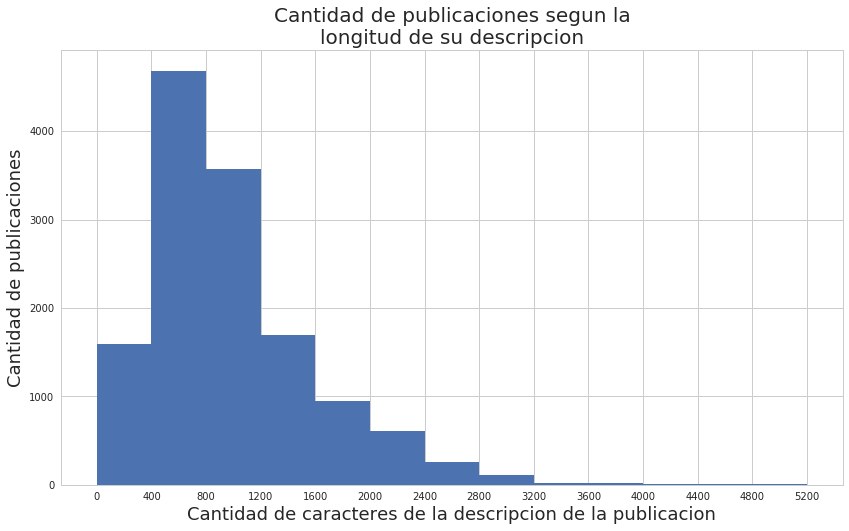

In [25]:
df_avisos_detalle['descripcion'].dropna().replace('<[^>]*>', '', regex=True).apply(len).hist(
    figsize=(14,8), bins=13, range=[0, 5201]);
plt.xlabel('Cantidad de caracteres de la descripcion de la publicacion', fontsize=18);
plt.ylabel('Cantidad de publicaciones', fontsize=18)
plt.title('Cantidad de publicaciones segun la\nlongitud de su descripcion', fontsize=20);
plt.xticks(range(0, 5201, 400))
plt.show();

## Frecuencia de palabras en titulos y descripciones

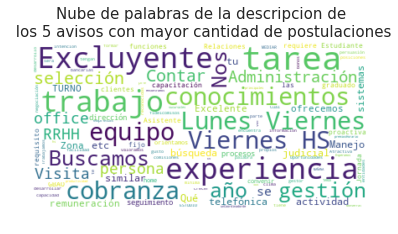

In [26]:
arr_temp = pd.merge(df_avisos_detalle, df_postulaciones.loc[df_postulaciones['idaviso'].value_counts().head(5)], 
         on='idaviso', how='inner')['descripcion']
arr_temp = arr_temp.replace('<[^>]*>', '', regex=True).replace({'\xa0': ''}, regex=True)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(arr_temp.values))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras de la descripcion de\n los 5 avisos con mayor cantidad de postulaciones', fontsize=15);
plt.show()

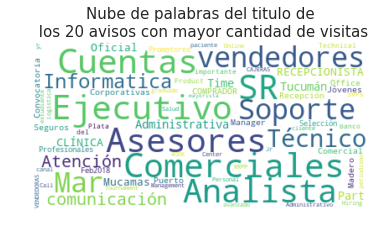

In [27]:
arr_temp = pd.merge(df_avisos_detalle, df_vistas_general.loc[df_vistas_general['idAviso'].value_counts().head(20)], 
         left_on='idaviso', right_on='idAviso', how='inner')['titulo']

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(arr_temp.values))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras del titulo de\n los 20 avisos con mayor cantidad de visitas', fontsize=15);
plt.show()

## Visitas de avisos por area

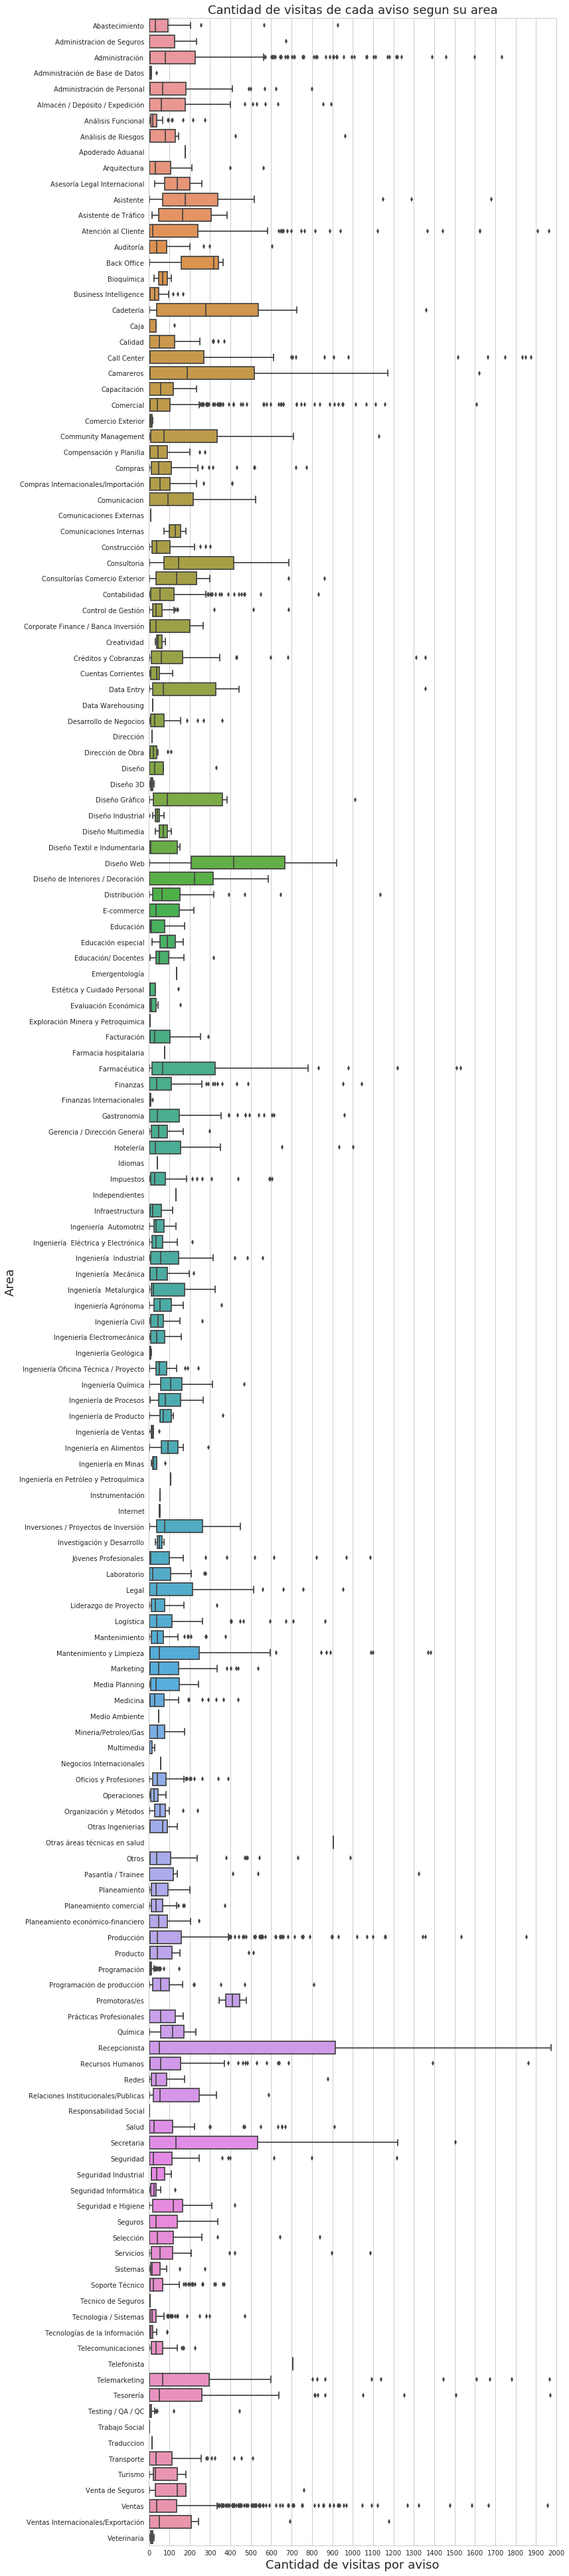

In [28]:
df_temp = pd.merge(df_avisos_detalle, df_vistas_general, 
         left_on='idaviso', right_on='idAviso', how='inner')[['idaviso', 'nombre_area']]

df_temp['cant'] = df_temp.groupby('idaviso')['idaviso'].transform('count')
df_temp.drop_duplicates(inplace=True)
df_temp.sort_values(by='nombre_area', inplace=True)

plt.figure(figsize = (11,70))
plot = sns.boxplot(y='nombre_area',x='cant',data=df_temp, )
plot.set_xlim([0, 1000])
plot.set_ylabel('Area',size=18)
plot.set_xlabel('Cantidad de visitas por aviso',size=18)
plot.set_title('Cantidad de visitas de cada aviso segun su area',fontsize=18)
plot.set_xticks(range(0, 2001, 100))
plt.show();

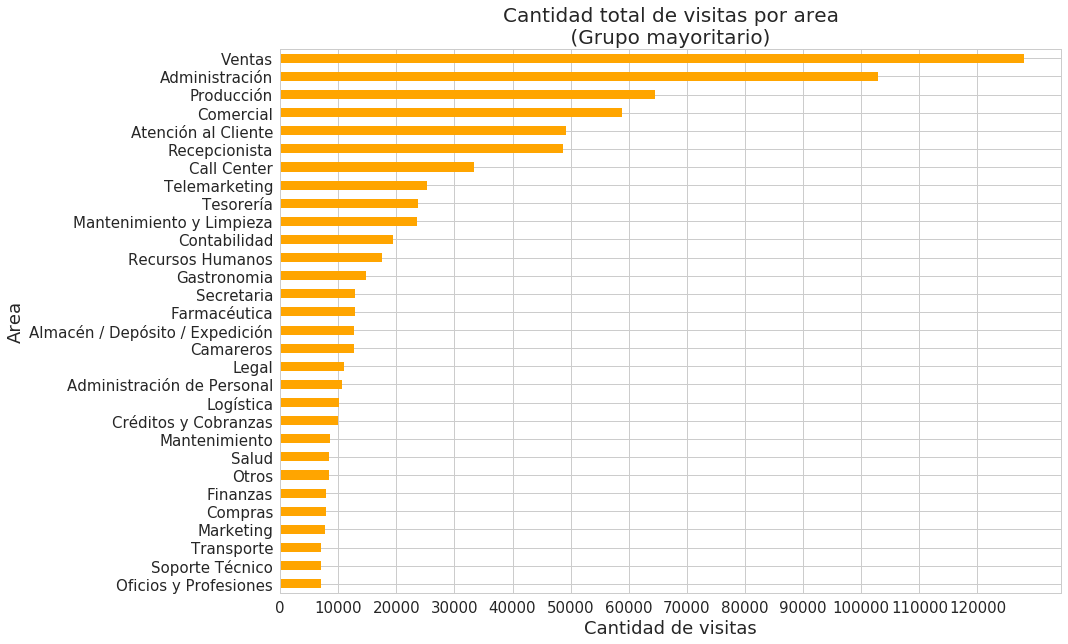

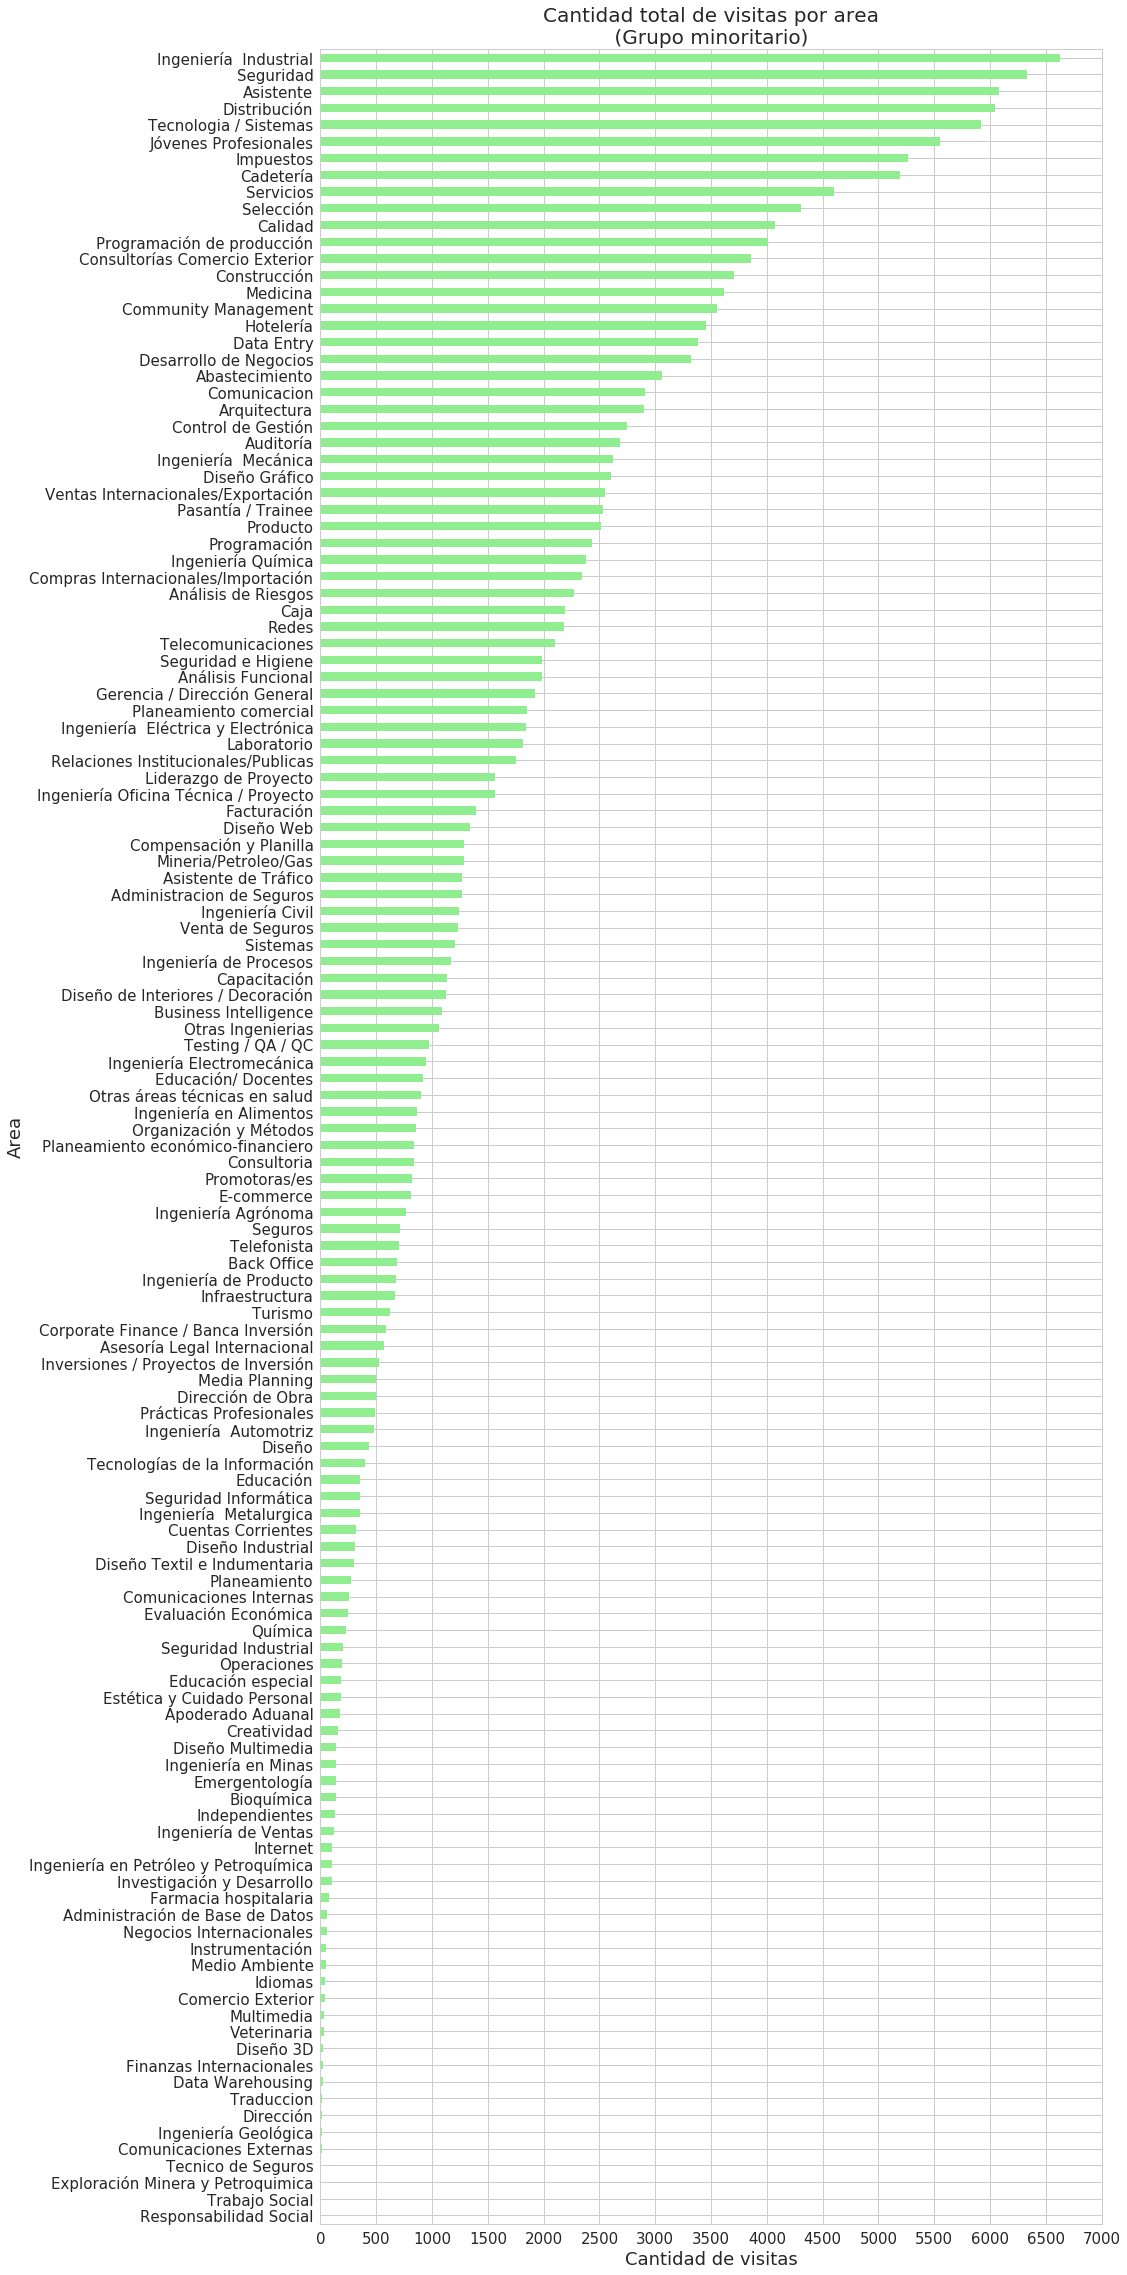

In [29]:
plot = df_temp.groupby('nombre_area').sum()['cant'].sort_values().tail(30).plot.barh(figsize=(14,10),fontsize=15, color='orange');
plot.set_title("Cantidad total de visitas por area\n (Grupo mayoritario) ", fontsize=20)
plot.set_ylabel("Area", fontsize=18)
plot.set_xlabel("Cantidad de visitas", fontsize=18)
plot.set_xticks(range(0, 120001, 10000))
plt.show()

plot = df_temp.groupby('nombre_area').sum()['cant'].sort_values()[:-30].plot.barh(figsize=(14,40),fontsize=15, color='lightgreen');
plot.set_title("Cantidad total de visitas por area\n (Grupo minoritario) ", fontsize=20)
plot.set_ylabel("Area", fontsize=18)
plot.set_xlabel("Cantidad de visitas", fontsize=18)
plot.set_xticks(range(0, 7001, 500))
plt.show()

In [30]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Porcentajes de Avisos por nivel agrupados por Carga Horaria

A continuación se realizara un análisis de los avisos agrupandolos por Nivel requerido y la carga horaria solicitada para cada uno.

In [31]:
avisos_x_nivel_y_carga = df_avisos_detalle.groupby(['tipo_de_trabajo', 'nivel_laboral']).size().unstack(fill_value=0)
avisos_x_nivel_y_carga

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
tipo_de_trabajo,,,,,
Fines de Semana,0,0,1,3,10
Full-time,179,745,1777,751,8887
Part-time,1,7,350,132,373
Pasantia,0,0,49,10,4
Por Contrato,0,5,10,5,17
Por Horas,0,1,8,15,39
Primer empleo,0,0,2,1,0
Teletrabajo,1,50,1,1,57
Temporario,0,1,18,3,20


Como se puede observar hay una diferencia importante entre las solicitudes para trabajo Full-time con respecto al resto. A fin de poder evaluar como es la distribución de Cargas solicitadas con respecto a cada nivel solicitado, lo que se hará es calcular el porcentaje para cada 

In [32]:
avisos_nivel_tipo_carga = avisos_x_nivel_y_carga.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_nivel_tipo_carga

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
tipo_de_trabajo,,,,,
Fines de Semana,0.000,0.000,0.045,0.326,0.106
Full-time,98.895,92.089,80.190,81.542,94.472
Part-time,0.552,0.865,15.794,14.332,3.965
Pasantia,0.000,0.000,2.211,1.086,0.043
Por Contrato,0.000,0.618,0.451,0.543,0.181
Por Horas,0.000,0.124,0.361,1.629,0.415
Primer empleo,0.000,0.000,0.090,0.109,0.000
Teletrabajo,0.552,6.180,0.045,0.109,0.606
Temporario,0.000,0.124,0.812,0.326,0.213


[Text(0.5,0,'Gerencia / Alta Gerencia / Dirección'),
 Text(1.5,0,'Jefe / Supervisor / Responsable'),
 Text(2.5,0,'Junior'),
 Text(3.5,0,'Otro'),
 Text(4.5,0,'Senior / Semi-Senior')]

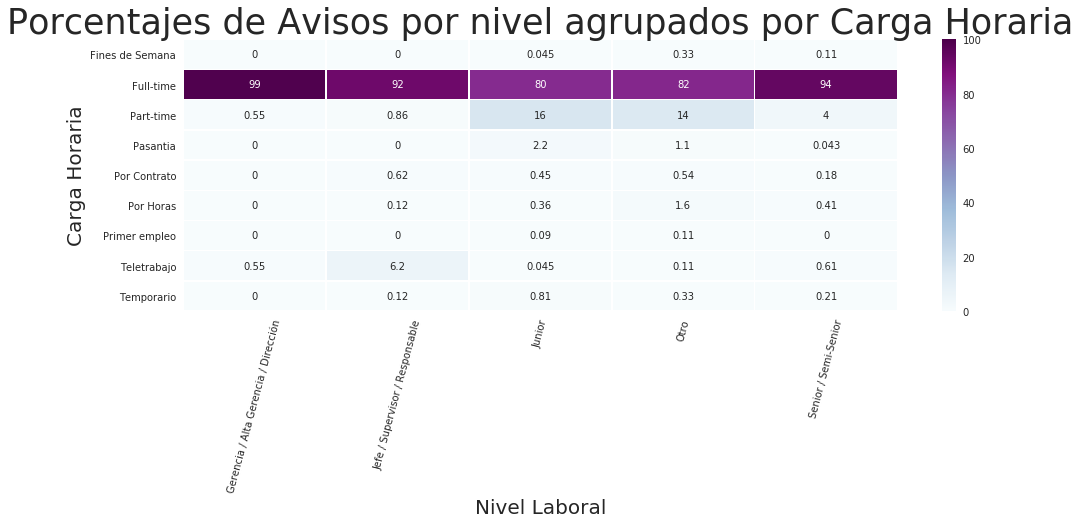

In [33]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_tipo_carga,vmin=0,vmax=100, cmap='BuPu', linewidths=0.5, annot=True)
avisos_heatMap.set_ylabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_xlabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por nivel agrupados por Carga Horaria", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_tipo_carga.columns.values, rotation=75)

## Conclusión
Se puede observar que predomina los trabajos con dedicación Full-time, aunque en el caso de los cargos de nivel menor, existe una mayor variación.

# Porcentajes de Avisos por carga horaria, agrupados por nivel
En este caso, evaluaremos a partir de los mismos datos, pero revisando como se distribuyen dentro de una misma carga horaria los niveles solicitados

In [34]:
avisos_x_carga_y_nivel = df_avisos_detalle.groupby(['nivel_laboral','tipo_de_trabajo']).size().unstack(fill_value=0)
avisos_x_carga_y_nivel

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nivel_laboral,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,0,179,1,0,0,0,0,1,0
Jefe / Supervisor / Responsable,0,745,7,0,5,1,0,50,1
Junior,1,1777,350,49,10,8,2,1,18
Otro,3,751,132,10,5,15,1,1,3
Senior / Semi-Senior,10,8887,373,4,17,39,0,57,20


In [35]:
avisos_nivel_carga_tipo = avisos_x_carga_y_nivel.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_nivel_carga_tipo

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nivel_laboral,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,0.000,1.451,0.116,0.000,0.000,0.000,0.000,0.909,0.000
Jefe / Supervisor / Responsable,0.000,6.038,0.811,0.000,13.514,1.587,0.000,45.455,2.381
Junior,7.143,14.401,40.556,77.778,27.027,12.698,66.667,0.909,42.857
Otro,21.429,6.086,15.295,15.873,13.514,23.810,33.333,0.909,7.143
Senior / Semi-Senior,71.429,72.024,43.221,6.349,45.946,61.905,0.000,51.818,47.619


[Text(0.5,0,'Fines de Semana'),
 Text(1.5,0,'Full-time'),
 Text(2.5,0,'Part-time'),
 Text(3.5,0,'Pasantia'),
 Text(4.5,0,'Por Contrato'),
 Text(5.5,0,'Por Horas'),
 Text(6.5,0,'Primer empleo'),
 Text(7.5,0,'Teletrabajo'),
 Text(8.5,0,'Temporario')]

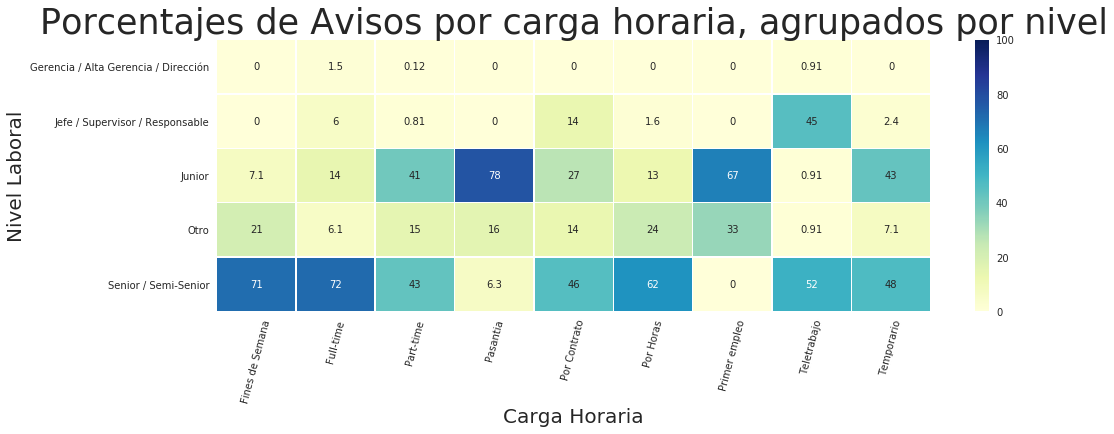

In [36]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_carga_tipo,vmin=0,vmax=100, cmap='YlGnBu', linewidths=0.5, annot=True)
avisos_heatMap.set_xlabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_ylabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por carga horaria, agrupados por nivel", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_carga_tipo.columns.values, rotation=75)

## Conclusion
Aquí se observa como para todos los tipos de contratación, como de acuerdo al mayor la exigencia de la carga, aumenta el nivel laboral solicitado.

# Avisos publicados por Areas y Nivel

Para analizar este punto, se observan muchas areas que cuentan con pocos pedidos. 
Se filtraran primero para aquellas Areas, donde la cantidad de publicaciones supere a la media, obteniendo asi una muestra que nos permite observar la distribución por Area y el nivel que se solicita para cada una

In [37]:
cant_x_area = df_avisos_detalle.groupby('nombre_area').size().reset_index(name='counts')
filtro_area_mayor_mean = cant_x_area[cant_x_area["counts"] > cant_x_area["counts"].mean()]
aux = pd.merge(df_avisos_detalle,filtro_area_mayor_mean,on="nombre_area",how="inner")
cant_x_nivel = aux.groupby(['nombre_area','nivel_laboral']).size().unstack(fill_value=0).transpose()
cant_x_nivel

nombre_area,Administración,Administración de Personal,Almacén / Depósito / Expedición,Análisis Funcional,Atención al Cliente,Calidad,Call Center,Comercial,Compras,Construcción,...,Seguridad,Selección,Soporte Técnico,Tecnologia / Sistemas,Telecomunicaciones,Telemarketing,Tesorería,Testing / QA / QC,Transporte,Ventas
nivel_laboral,,,,,,,,,,,,,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,13,0,1,0,1,2,0,32,0,0,...,0,0,0,4,0,1,0,0,1,30
Jefe / Supervisor / Responsable,33,8,9,0,14,12,7,49,12,18,...,5,0,5,27,3,0,2,2,6,72
Junior,236,32,34,12,121,17,51,150,20,5,...,14,23,56,27,11,48,33,2,10,253
Otro,49,3,18,2,35,4,27,63,1,10,...,16,2,5,21,7,15,7,2,27,140
Senior / Semi-Senior,570,109,122,86,176,59,106,689,137,64,...,72,65,137,309,65,74,95,79,104,1164


[Text(0.5,0,'Administración'),
 Text(1.5,0,'Administración de Personal'),
 Text(2.5,0,'Almacén / Depósito / Expedición'),
 Text(3.5,0,'Análisis Funcional'),
 Text(4.5,0,'Atención al Cliente'),
 Text(5.5,0,'Calidad'),
 Text(6.5,0,'Call Center'),
 Text(7.5,0,'Comercial'),
 Text(8.5,0,'Compras'),
 Text(9.5,0,'Construcción'),
 Text(10.5,0,'Contabilidad'),
 Text(11.5,0,'Créditos y Cobranzas'),
 Text(12.5,0,'Desarrollo de Negocios'),
 Text(13.5,0,'Finanzas'),
 Text(14.5,0,'Gastronomia'),
 Text(15.5,0,'Impuestos'),
 Text(16.5,0,'Ingeniería  Industrial'),
 Text(17.5,0,'Legal'),
 Text(18.5,0,'Logística'),
 Text(19.5,0,'Mantenimiento'),
 Text(20.5,0,'Mantenimiento y Limpieza'),
 Text(21.5,0,'Marketing'),
 Text(22.5,0,'Medicina'),
 Text(23.5,0,'Oficios y Profesiones'),
 Text(24.5,0,'Otros'),
 Text(25.5,0,'Producción'),
 Text(26.5,0,'Programación'),
 Text(27.5,0,'Recepcionista'),
 Text(28.5,0,'Recursos Humanos'),
 Text(29.5,0,'Salud'),
 Text(30.5,0,'Seguridad'),
 Text(31.5,0,'Selección'),
 Text(32

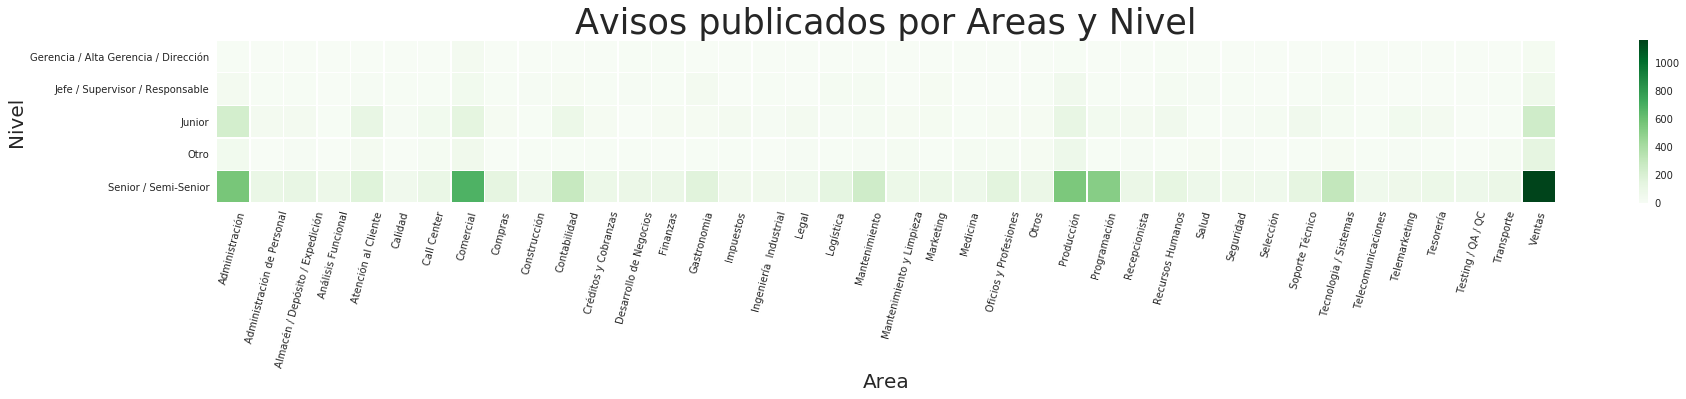

In [38]:
plt.figure(figsize = (30,3))
avisos_heatMap = sns.heatmap(cant_x_nivel, cmap='Greens', linewidths=0.5)
avisos_heatMap.set_ylabel("Nivel", fontsize = 20)
avisos_heatMap.set_xlabel("Area", fontsize = 20)
avisos_heatMap.set_title("Avisos publicados por Areas y Nivel", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = cant_x_nivel.columns.values, rotation=75)

## Conclusión
En este caso, se puede observar una distribucion mas pareja, asi como tamabien aquellas areas donde aumenta la exigencia en el nivel. 
La Diferencia entre las distintas áreas se muestra similar, salvo en el caso de las Ventas, donde se solicita un nivel mucho mayo que en el resto.

## Relación entre publicaciones y postulaciones

In [39]:
types= {"nombre_area": "category", "nivel_laboral": "category", "tipo_de_trabajo": "category"}
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv', dtype=types)

In [40]:
datetimes=["fechapostulacion"]
df_postulaciones = pd.read_csv('../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv', parse_dates=datetimes)

In [41]:
df_postulaciones_avisos = pd.merge(df_avisos_detalle,df_postulaciones, on="idaviso", how="inner")

In [42]:
postulaciones_promedio_tipo_trabajo=df_postulaciones_avisos.groupby(["tipo_de_trabajo"]).size()/df_avisos_detalle.groupby("tipo_de_trabajo").size()

### Relacion segun tipo de trabajo

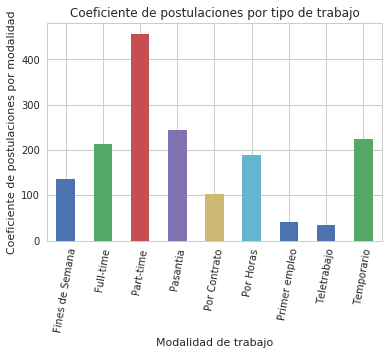

In [43]:
title = 'Coeficiente de postulaciones por tipo de trabajo'
ax = postulaciones_promedio_tipo_trabajo.plot(kind='bar',rot=80,title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por modalidad');
ax.set_xlabel('Modalidad de trabajo');

La modalidad con mayor coeficiente de postulantes es la modalidad *"Part-time"*, el segundo puesto pertenece a *"Temporario"* con casi la mitad del anterior. Las modalidades que presentarn un menor coeficiente son *"Teletrabajo"* y *"Primer empleo"*

In [44]:
df_postulaciones_avisos["diadelasemana"] = df_postulaciones_avisos.fechapostulacion.dt.dayofweek
aux = df_postulaciones_avisos.groupby(["tipo_de_trabajo","diadelasemana"]).size().to_frame().reset_index(level=[0,1])
aux.columns = ['tipo_de_trabajo', 'dia_de_la_semana', 'cantidad']

[]

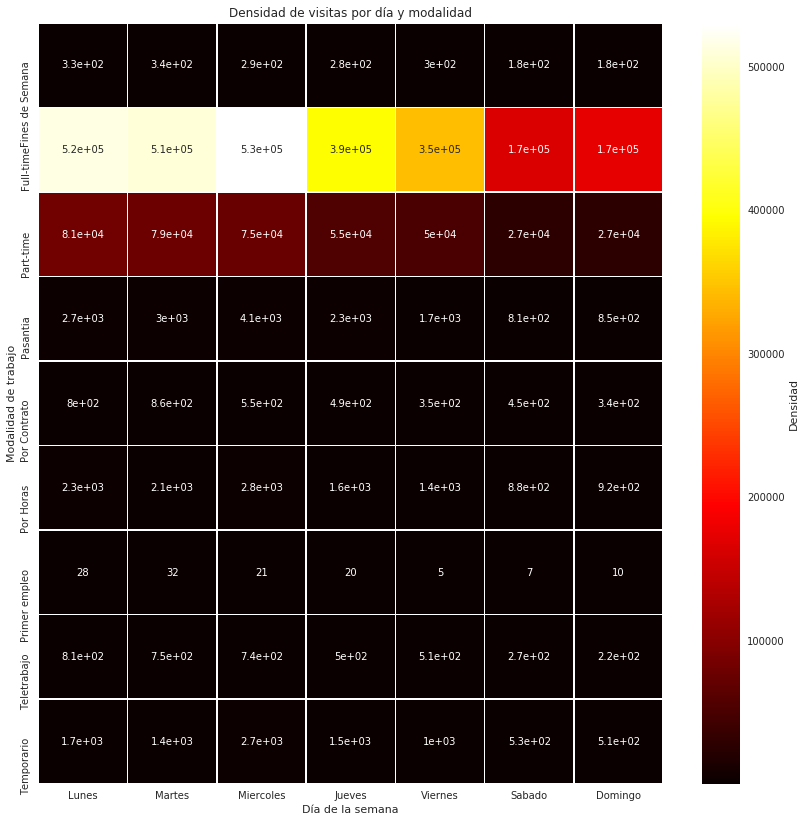

In [45]:
fig, ax = plt.subplots(figsize=(14,14))

weekday_map= ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
graph = sns.heatmap(aux.pivot_table(index='tipo_de_trabajo',columns='dia_de_la_semana',values='cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Modalidad de trabajo');
ax.set_title("Densidad de visitas por día y modalidad")
graph.plot()

Text(0.5,1,'Densidad logaritmica de visitas por día y modalidad')

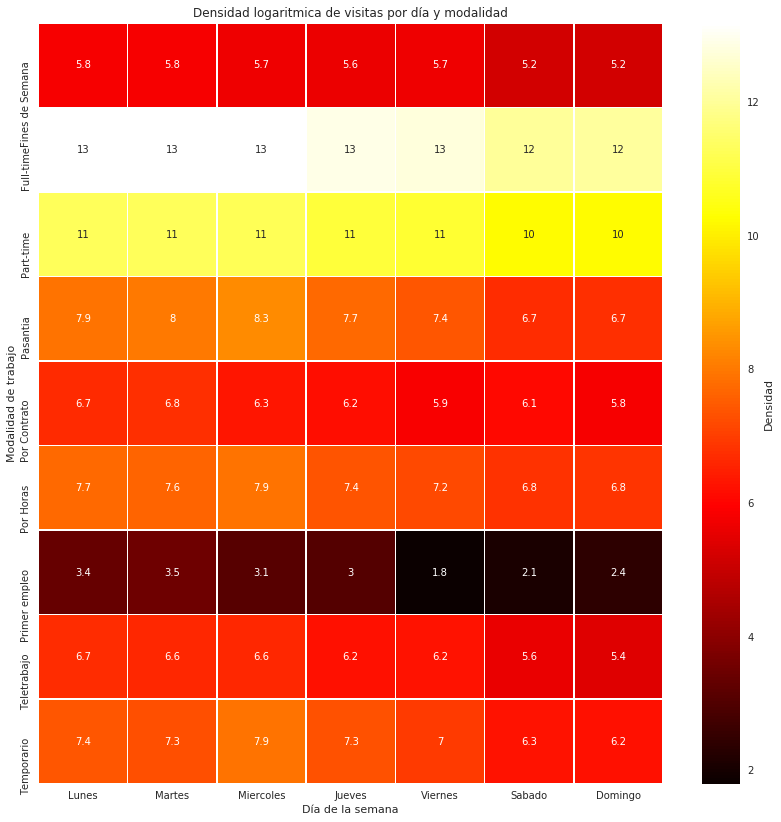

In [46]:
aux["log_cantidad"] = np.log(aux.cantidad+1)
fig, ax = plt.subplots(figsize=(14,14))

graph = sns.heatmap(aux.pivot_table(index='tipo_de_trabajo',columns='dia_de_la_semana',values='log_cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Modalidad de trabajo');
ax.set_title("Densidad logaritmica de visitas por día y modalidad")

## Relacion segun nivel laboral

In [47]:
postulaciones_promedio_nivel_laboral=df_postulaciones_avisos.groupby(["nivel_laboral"]).size()/df_avisos_detalle.groupby("nivel_laboral").size()

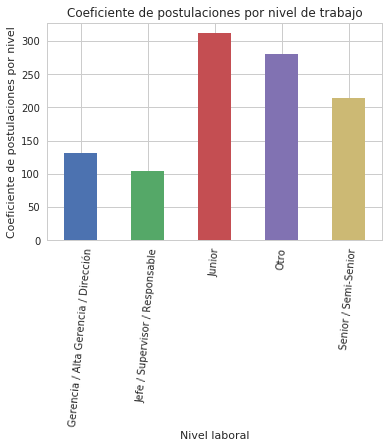

In [48]:
title = 'Coeficiente de postulaciones por nivel de trabajo'
postulaciones_promedio_nivel_laboral.plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por nivel');
ax.set_xlabel('Nivel laboral');

In [49]:
aux = df_postulaciones_avisos.groupby(["nivel_laboral","diadelasemana"]).size().to_frame().reset_index(level=[0,1])
aux.columns = ['nivel_laboral', 'dia_de_la_semana', 'cantidad']

Text(0.5,1,'Densidad de visitas por día y nivel laboral')

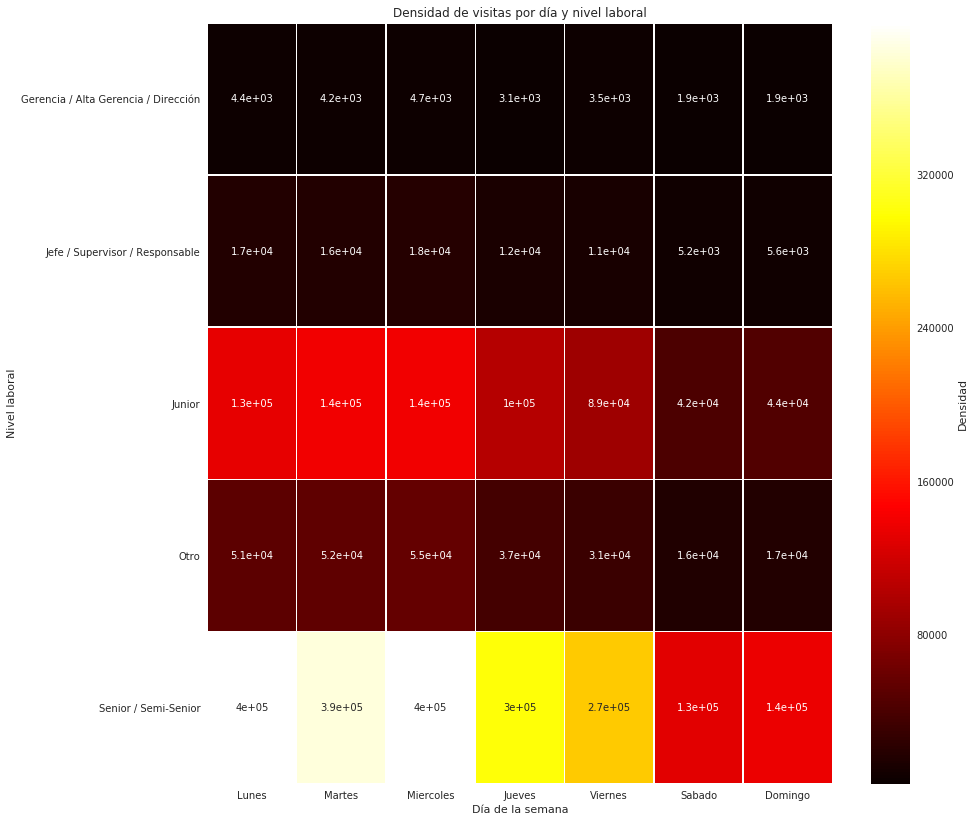

In [50]:
fig, ax = plt.subplots(figsize=(14,14))

graph = sns.heatmap(aux.pivot_table(index='nivel_laboral',columns='dia_de_la_semana',values='cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Nivel laboral');
ax.set_title("Densidad de visitas por día y nivel laboral")

Text(0.5,1,'Densidad logaritmica de visitas por día y nivel laboral')

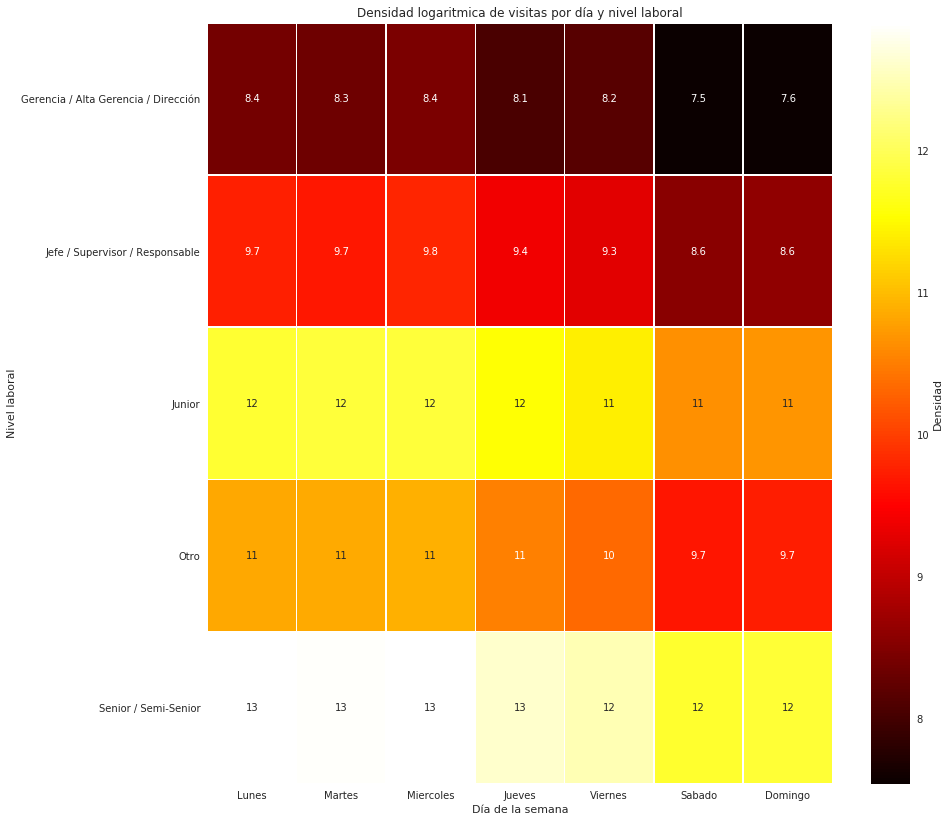

In [51]:
aux["log_cantidad"] = np.log(aux.cantidad+1)
fig, ax = plt.subplots(figsize=(14,14))
graph = sns.heatmap(aux.pivot_table(index='nivel_laboral',columns='dia_de_la_semana',values='log_cantidad'),\
           linewidths=.5,cmap="hot", ax=ax, xticklabels=weekday_map, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Día de la semana');
ax.set_ylabel('Nivel laboral');
ax.set_title("Densidad logaritmica de visitas por día y nivel laboral")

## Relacion segun area

In [52]:
postulaciones_promedio_area=df_postulaciones_avisos.groupby(["nombre_area"]).size()/df_avisos_detalle.groupby("nombre_area").size()

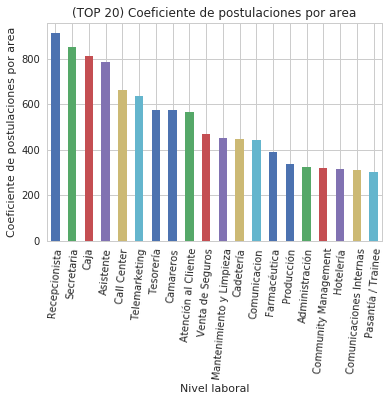

In [53]:
title = '(TOP 20) Coeficiente de postulaciones por area'
postulaciones_promedio_area.sort_values(ascending=False).head(20)\
    .plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por area');
ax.set_xlabel('Nivel laboral');

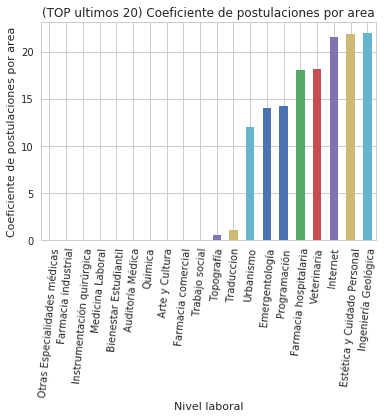

In [54]:
title = '(TOP ultimos 20) Coeficiente de postulaciones por area'
postulaciones_promedio_area.sort_values().head(20)\
    .plot(kind="bar", rot = 85, title=title)
ax = plt.gca()
ax.set_ylabel('Coeficiente de postulaciones por area');
ax.set_xlabel('Nivel laboral');

In [55]:
aux = df_postulaciones_avisos.groupby(["nivel_laboral", "tipo_de_trabajo"]).size() \
    .divide(df_avisos_detalle.groupby(["nivel_laboral", "tipo_de_trabajo"]).size())
aux = aux.to_frame().reset_index(level=[0,1])
aux.columns = ['nivel_laboral', 'tipo_de_trabajo', 'cantidad']
aux["log_cantidad"] = np.log(aux.cantidad+1)

Text(0.5,1,'Densidad de postulaciones por nivel laboral y tipo de trabajo')

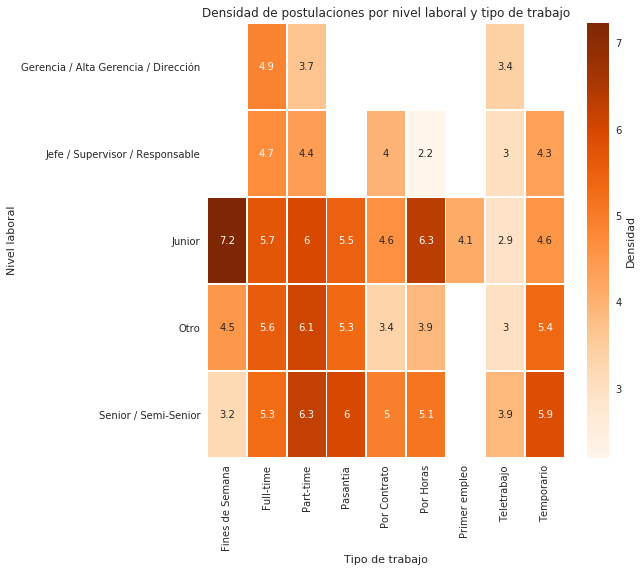

In [56]:
fig, ax = plt.subplots(figsize=(8,8))

graph = sns.heatmap(aux.pivot_table(index='nivel_laboral',columns='tipo_de_trabajo',values='log_cantidad'),\
           linewidths=.5,cmap="Oranges", ax=ax, cbar_kws={'label': 'Densidad'}, annot=True)
ax.set_xlabel('Tipo de trabajo');
ax.set_ylabel('Nivel laboral');
ax.set_title("Densidad de postulaciones por nivel laboral y tipo de trabajo")

In [60]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_vistas = pd.read_csv("../csv/datos_navent_fiuba/fiuba_3_vistas.csv")
df_postulaciones = pd.read_csv("../csv/datos_navent_fiuba/fiuba_4_postulaciones.csv")

# Análisis del tiempo entre la vista y la postulación
A partir del siguiente análisis se propone realizar un análisis del tiempo que transcurre entre que un postulante ve por primera vez un aviso, y el que pasa hasta que se postula al mismo.

In [61]:
df_postulaciones['fechapostulacion'] = pd.to_datetime(df_postulaciones['fechapostulacion'], errors='coerce')

Unifico para que tanto las vistas como las postulaciones esten en el mismo tipo de datos, para poder calcular el delta entre el momento en que se postula, con la primera vez que vio el aviso

In [62]:
df_vistas['timestamp1'] = pd.to_datetime(df_vistas['timestamp'], errors='coerce')

Remuevo aquellos en los que se accede a la vista una vez postulado

In [63]:
aux = pd.merge(df_vistas,df_postulaciones,left_on=['idAviso','idpostulante'],right_on=['idaviso','idpostulante'],how='inner')
temp = aux[aux["timestamp1"]<aux["fechapostulacion"]]

In [64]:
temp["delta"] = (temp['fechapostulacion']-temp['timestamp1']).dt.round('5min')
tmp = temp.drop_duplicates(['idpostulante','idaviso'],keep='first').groupby('delta').size()
tmp = tmp.to_frame()
tmp.reset_index(inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Figure size 2880x720 with 0 Axes>

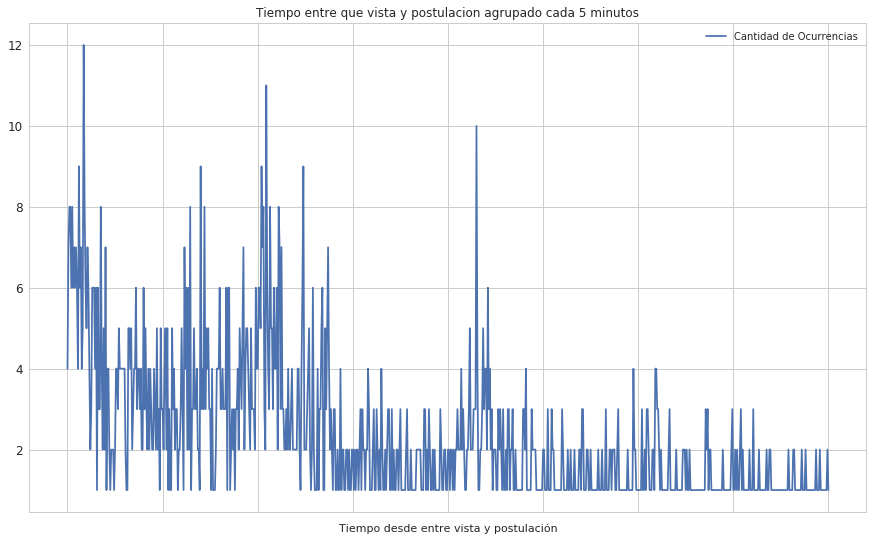

In [65]:
plt.figure(figsize = (40,10))
tmp.columns = [ 'Tiempo desde entre vista y postulación','Cantidad de Ocurrencias']
tmp.plot(x="Tiempo desde entre vista y postulación",y="Cantidad de Ocurrencias", title ="Tiempo entre que vista y postulacion agrupado cada 5 minutos", figsize=(15, 10), legend=True, fontsize=12)

# Conclusión
Se puede observar que inicialmente, el tiempo que se tarda entre el ver el aviso, y postularse es corto. Y conforme pasan los intervalos de tiempo, disminuye la cantidad de personas que esperaron tanto para postularse desde la primera vez que vio el aviso

# Tiempo de Vida de un aviso
Para evaluar el tiempo de publicación de un aviso, como no contamos con información sobre la fecha de publlicación y baja de la misma, lo que haremos es comparar la diferencia entre la primera y la ultima vez que se accedio a ver un aviso

In [66]:
df_agrupar_vistas = df_vistas.groupby('idAviso').agg({'timestamp1' : [np.min, np.max]})
df_agrupar_vistas["delta"] = (df_agrupar_vistas.timestamp1.amax-df_agrupar_vistas.timestamp1.amin).dt.round('60min')

Como lo que estoy buscando evaluar es el tiempo entre la primer y ultima visita, retiro todos aquellos valores donde el delta me da 0(cero).

In [70]:
tmp = df_agrupar_vistas[df_agrupar_vistas["delta"].dt.total_seconds()>0].groupby('delta').size()
tmp = tmp.to_frame()
tmp.reset_index(inplace=True)

In [71]:
tmp["delta"]=tmp["delta"].dt.total_seconds()/3600

<Figure size 2880x720 with 0 Axes>

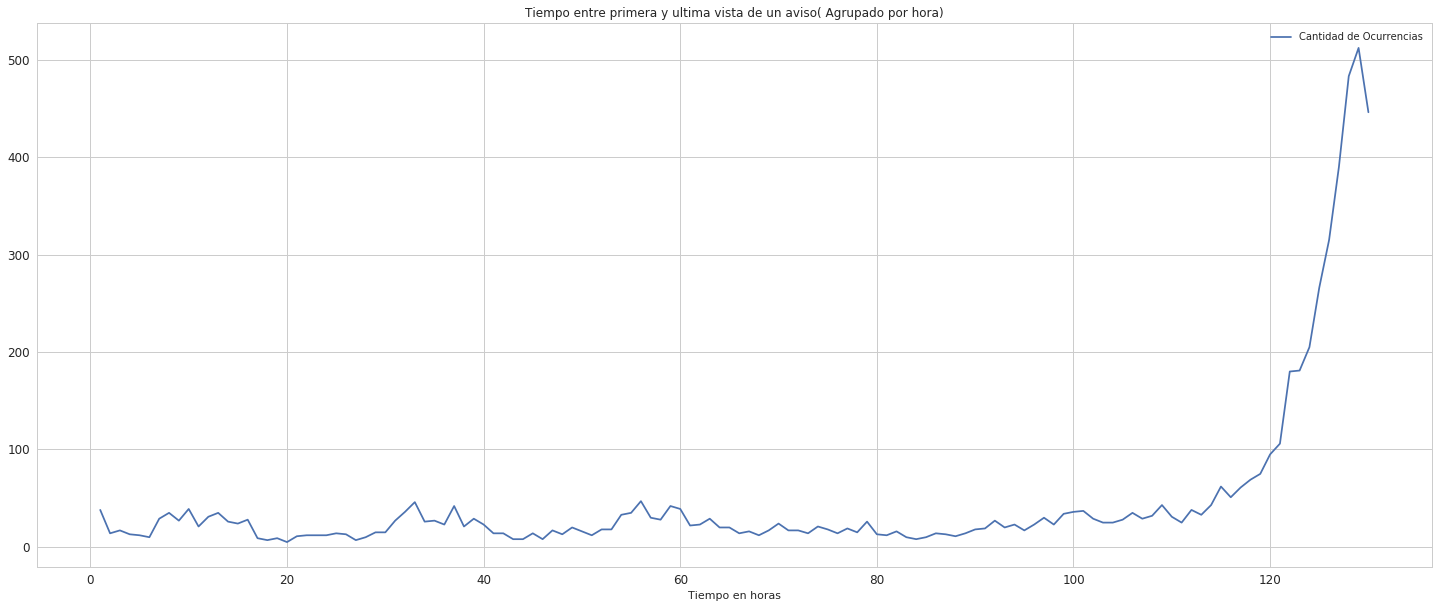

In [72]:
plt.figure(figsize = (40,10))
tmp.columns = [ 'Tiempo en horas','Cantidad de Ocurrencias']
tmp.plot(x="Tiempo en horas",y="Cantidad de Ocurrencias", title ="Tiempo entre primera y ultima vista de un aviso( Agrupado por hora)", figsize=(25, 10), legend=True, fontsize=12)

## Conclusión
A partir del grafico, se puede observar que la mayoria de los avisos presentan entre que accede el primer usuario, y la utima vez que es visto, tiempo mayor